# Clusters
Este modulo contiene un conjunto de distintos ejemplos de clusterizaciones, nos sirve para mostrar el potencial de nbdev y como generar software de forma consistente. 

In [1]:
#| default_exp Cluster_ejemplo

In [45]:
#| hide
#| export
from nbdev.showdoc import *
import sklearn
import random 
import numpy as np
import shapely
#from libpysal.weights import Queen, KNN
from sklearn.cluster import DBSCAN, HDBSCAN, OPTICS, KMeans
import matplotlib.pyplot as plt

# Clase para generar puntos geométricos. 
Vamos hacer una clase para que contenga puntos y que sean ya geometrías. 

In [37]:
#| export
class data_points:
    """Una clase que contiene a los datos"""
    def __init__(self, n, min_x = 0, min_y = 0, max_x= 1, max_y=1, seed= None):
        if seed != None:
            random.seed(seed)
        
        self.Points = np.random.uniform(low= min_x, high= max_x, size=(n, 2));
        self.Points =  [shapely.Point(x[0],x[1]) for x in self.Points]

    
    def get_points(self):
        """Una funcion que para obtener los puntos"""
        return self.Points

    def get_Multypoint(self):
        """Regresa un objeto MultiPoint con los puntos"""
        return shapely.geometry.MultiPoint(self.Points)
    
    def get_X(self):
        """Regresa las coordenadas X"""
        return [x.x for x in self.Points]

    def get_Y(self):
        """Regresa las coordenadas X"""
        return [x.x for x in self.Points]
    
    def centroid(self):
        """Regresa el centroide de los puntos """
        return shapely.centroid(self.get_Multypoint())
    
    def as_array(self):
        """Regresa los puntos como un array"""
        list_arrays = np.array([ (geom.xy[0][0], geom.xy[1][0]) for geom in self.Points])
        return list_arrays
    
    

In [27]:
#| hide
datos_simples = data_points(40)


In [28]:
#| hide
datos_simples.get_points()

[<POINT (0.996 0.149)>,
 <POINT (0.909 0.298)>,
 <POINT (0.889 0.458)>,
 <POINT (0.73 0.063)>,
 <POINT (0.899 0.232)>,
 <POINT (0.01 0.038)>,
 <POINT (0.876 0.087)>,
 <POINT (0.56 0.002)>,
 <POINT (0.062 0.667)>,
 <POINT (0.081 0.943)>,
 <POINT (0.253 0.795)>,
 <POINT (0.935 0.164)>,
 <POINT (0.782 0.853)>,
 <POINT (0.764 0.186)>,
 <POINT (0.411 0.197)>,
 <POINT (0.971 0.491)>,
 <POINT (0.062 0.583)>,
 <POINT (0.058 0.548)>,
 <POINT (0.169 0.235)>,
 <POINT (0.451 0.461)>,
 <POINT (0.691 0.894)>,
 <POINT (0.353 0.965)>,
 <POINT (0.35 0.559)>,
 <POINT (0.822 0.513)>,
 <POINT (0.87 0.413)>,
 <POINT (0.094 0.75)>,
 <POINT (0.86 0.079)>,
 <POINT (0.87 0.536)>,
 <POINT (0.351 0.318)>,
 <POINT (0.286 0.206)>,
 <POINT (0.651 0.347)>,
 <POINT (0.149 0.121)>,
 <POINT (0.377 0.217)>,
 <POINT (0.753 0.05)>,
 <POINT (0.879 0.99)>,
 <POINT (0.703 0.994)>,
 <POINT (0.352 0.81)>,
 <POINT (0.715 0.212)>,
 <POINT (0.625 0.973)>,
 <POINT (0.022 0.607)>]

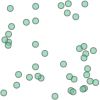

In [29]:
#| hide
datos_simples.get_Multypoint()

In [30]:
#| hide
datos_simples.get_X()

[0.9964074118796028,
 0.908786803650746,
 0.8894890145578562,
 0.7302691643866541,
 0.8990443970646913,
 0.010229283165427372,
 0.8757169523873513,
 0.5595231810005888,
 0.06213362443551129,
 0.08104386984996725,
 0.25280302202074123,
 0.9351896207304111,
 0.7821708997080871,
 0.7643793193060144,
 0.410943654596177,
 0.9711283808260337,
 0.06175863990811847,
 0.05816337501650881,
 0.1691946211851315,
 0.4509342606420099,
 0.6913791583474427,
 0.3526351707753874,
 0.35034826951325393,
 0.8218147273096494,
 0.8702875634541406,
 0.09436418323465723,
 0.8595840976704361,
 0.8699274788592372,
 0.351172367456149,
 0.28587658641773916,
 0.6507065636204077,
 0.1494580614253629,
 0.37717278827123624,
 0.7528076516807467,
 0.8792394715881241,
 0.7025455911341216,
 0.35177726767944884,
 0.7152609531788845,
 0.6250488664981095,
 0.021814834764093405]

In [31]:
#| hide
#| output: false
datos_simples.get_Y()

[0.9964074118796028,
 0.908786803650746,
 0.8894890145578562,
 0.7302691643866541,
 0.8990443970646913,
 0.010229283165427372,
 0.8757169523873513,
 0.5595231810005888,
 0.06213362443551129,
 0.08104386984996725,
 0.25280302202074123,
 0.9351896207304111,
 0.7821708997080871,
 0.7643793193060144,
 0.410943654596177,
 0.9711283808260337,
 0.06175863990811847,
 0.05816337501650881,
 0.1691946211851315,
 0.4509342606420099,
 0.6913791583474427,
 0.3526351707753874,
 0.35034826951325393,
 0.8218147273096494,
 0.8702875634541406,
 0.09436418323465723,
 0.8595840976704361,
 0.8699274788592372,
 0.351172367456149,
 0.28587658641773916,
 0.6507065636204077,
 0.1494580614253629,
 0.37717278827123624,
 0.7528076516807467,
 0.8792394715881241,
 0.7025455911341216,
 0.35177726767944884,
 0.7152609531788845,
 0.6250488664981095,
 0.021814834764093405]

In [32]:
#| hide
if len(datos_simples.get_X()) != len(datos_simples.get_Y()):
    raise Exception("Si hay problema la evaluacion ")

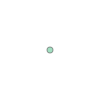

In [33]:
#| hide
data_points(10).centroid()

# Clase clusters 

Nuestra clase va a usar los datos usando la clase datos y vamos a hacer que genere los distintos tipod de clusters, los clusters van a regresar los poligonos respectivos. 




In [38]:
datos_simples = data_points(500, min_x = .75, min_y= .75, max_x= 1, max_y= 1 )

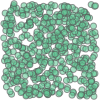

In [39]:
datos_simples.get_Multypoint()

In [40]:
datos_simples.as_array()

array([[0.77621234, 0.79858955],
       [0.87320783, 0.89900326],
       [0.88047107, 0.76231266],
       [0.90112796, 0.76057421],
       [0.9707128 , 0.97116069],
       [0.9040177 , 0.77641504],
       [0.92971626, 0.80330587],
       [0.82268145, 0.76674433],
       [0.81003807, 0.86097351],
       [0.79846432, 0.88074721],
       [0.81650096, 0.83567673],
       [0.89920233, 0.91812168],
       [0.89346045, 0.90815039],
       [0.98807086, 0.83595538],
       [0.90585313, 0.86777213],
       [0.85906567, 0.8525313 ],
       [0.96540515, 0.8535934 ],
       [0.98055103, 0.7583685 ],
       [0.90903079, 0.81761556],
       [0.8100987 , 0.98224383],
       [0.92422513, 0.81571277],
       [0.7557751 , 0.92758151],
       [0.80685266, 0.77055052],
       [0.87066005, 0.89158437],
       [0.95415328, 0.96973163],
       [0.96438953, 0.94687064],
       [0.98244377, 0.83331762],
       [0.95683982, 0.95802162],
       [0.9262239 , 0.93903607],
       [0.89003715, 0.78292305],
       [0.

In [54]:
#|eval: false
kmeans_c = KMeans()
Classes = kmeans_c.fit_predict(datos_simples.as_array())

In [55]:
#|eval: false
Classes

array([2, 1, 4, 4, 3, 4, 7, 2, 0, 0, 0, 1, 1, 7, 1, 1, 7, 7, 4, 6, 7, 6,
       2, 1, 3, 3, 7, 3, 3, 4, 6, 1, 6, 6, 7, 1, 6, 2, 7, 3, 6, 0, 1, 0,
       4, 2, 4, 5, 7, 5, 1, 6, 0, 6, 4, 0, 7, 3, 3, 5, 5, 6, 0, 2, 1, 5,
       3, 5, 1, 5, 5, 6, 4, 6, 2, 1, 5, 4, 1, 7, 4, 6, 0, 4, 2, 7, 0, 5,
       7, 1, 6, 0, 4, 4, 2, 7, 3, 1, 1, 0, 4, 4, 7, 3, 5, 5, 3, 5, 0, 7,
       1, 3, 3, 7, 7, 4, 7, 7, 6, 0, 3, 3, 0, 3, 0, 5, 6, 5, 7, 7, 2, 0,
       2, 7, 5, 3, 4, 5, 7, 4, 4, 5, 4, 2, 4, 3, 1, 2, 1, 0, 4, 7, 3, 4,
       7, 0, 2, 5, 7, 1, 5, 5, 6, 0, 5, 1, 1, 0, 4, 3, 3, 0, 6, 5, 7, 2,
       7, 4, 6, 4, 3, 0, 0, 7, 6, 6, 7, 6, 0, 3, 5, 1, 1, 7, 7, 2, 1, 1,
       1, 1, 1, 1, 0, 3, 0, 4, 3, 6, 0, 5, 6, 7, 7, 5, 1, 6, 5, 4, 7, 2,
       6, 3, 5, 3, 3, 3, 2, 6, 5, 4, 2, 1, 1, 7, 6, 6, 7, 3, 4, 1, 5, 3,
       1, 1, 2, 0, 5, 4, 3, 4, 5, 3, 6, 1, 2, 3, 0, 4, 2, 1, 7, 3, 2, 2,
       6, 3, 7, 5, 0, 0, 0, 1, 0, 0, 3, 0, 1, 3, 0, 1, 3, 1, 0, 2, 3, 6,
       5, 4, 4, 2, 5, 7, 1, 5, 1, 7, 5, 2, 3, 4, 7,

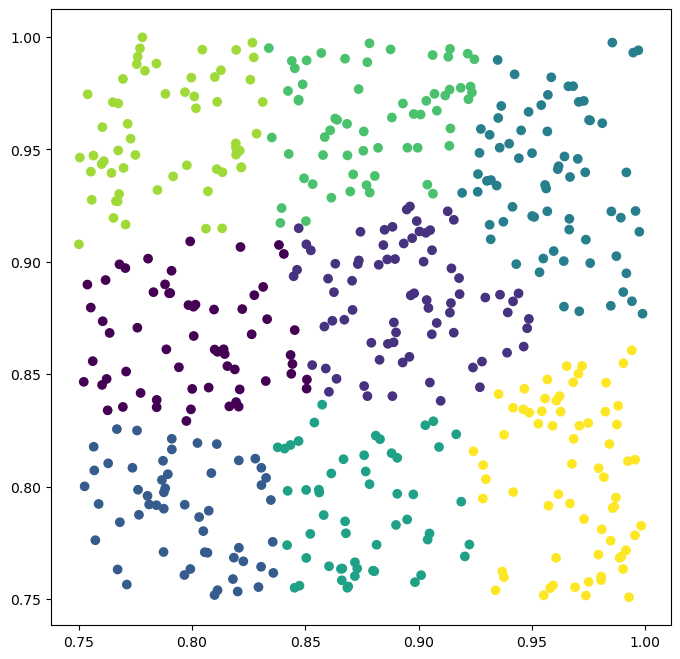

In [57]:
#|eval: false

fig, axs = plt.subplots( figsize=(8, 8))
puntos= datos_simples.as_array()

axs.scatter(puntos[:, 0], puntos[:, 1], c=Classes)

In [188]:
class Clusters:
    def __init__(self, data_points_i, seed=1234):
        if seed != None:
            random.seed(seed)
        
        self.data_structure =  data_points_i

    def KMeans(self, **kwargs):
        """Use Kmeans to obtain the clusters"""
        kmeans_c = KMeans(**kwargs)
        classes_val = kmeans_c.fit_predict(self.data_structure.as_array())
        self.data_structure.classes_Kmeans = classes_val
        if 'ret_model' in kwargs and kwargs['ret_model']==True :
            return  kmeans_c
        

    def DBSCAN(self, **kwargs):
        """Use DBSCAN to obtain clusters"""
        print(kwargs)
        db = DBSCAN(**kwargs).fit(self.data_structure.as_array())
        self.data_structure.classes_DBSCAN = db.labels_
        if 'ret_model' in kwargs and kwargs['ret_model']==True :
            return  db
    
    
    def HDBSCAN(self, **kwargs):
        """Use HDBSCAN to obtain the clusters"""
        hdb = HDBSCAN(**kwargs).fit(self.data_structure.as_array())
        self.data_structure.classes_HDBSCAN = hdb.labels_
        if 'ret_model' in kwargs and kwargs['ret_model']==True : 
            return  hdb
        

    def OPTICS(self, **kwargs):
        optics=  OPTICS(**kwargs).fit(self.data_structure.as_array())
        self.data_structure.classes_OPTICS = optics.labels_
        
        if 'ret_model' in kwargs and kwargs['ret_model']==True :
            return  optics
        


In [189]:
cluster_all  = Clusters(datos_simples)

cluster_all.KMeans()

In [190]:
cluster_all.data_structure.classes_Kmeans

array([4, 7, 0, 6, 5, 6, 6, 0, 4, 4, 4, 7, 7, 2, 7, 7, 2, 6, 6, 3, 6, 3,
       0, 7, 5, 5, 2, 5, 5, 0, 3, 7, 3, 3, 6, 2, 3, 4, 6, 2, 3, 4, 7, 7,
       7, 0, 0, 1, 6, 1, 7, 3, 4, 3, 0, 7, 6, 5, 5, 1, 1, 3, 7, 0, 7, 1,
       5, 1, 7, 1, 5, 3, 0, 3, 4, 2, 1, 6, 1, 6, 0, 3, 4, 0, 0, 6, 4, 1,
       2, 7, 3, 4, 0, 0, 0, 2, 5, 2, 7, 7, 0, 7, 6, 5, 1, 1, 5, 1, 4, 6,
       7, 5, 5, 6, 2, 6, 2, 6, 3, 4, 5, 5, 4, 5, 4, 5, 3, 1, 6, 2, 4, 4,
       0, 2, 1, 5, 0, 5, 6, 0, 0, 1, 0, 4, 0, 2, 2, 0, 7, 4, 0, 2, 2, 0,
       2, 4, 4, 1, 6, 7, 1, 1, 3, 7, 1, 7, 7, 4, 0, 2, 2, 4, 3, 1, 2, 0,
       2, 7, 3, 0, 5, 4, 4, 6, 3, 3, 2, 3, 4, 5, 1, 7, 7, 2, 6, 0, 7, 7,
       7, 2, 7, 7, 4, 5, 7, 0, 2, 3, 3, 1, 3, 2, 6, 5, 7, 1, 5, 0, 6, 0,
       3, 5, 1, 5, 5, 5, 4, 3, 1, 0, 0, 7, 2, 6, 3, 3, 6, 2, 0, 7, 1, 5,
       7, 7, 0, 4, 1, 7, 5, 0, 1, 5, 3, 7, 4, 5, 4, 7, 0, 7, 6, 5, 0, 4,
       3, 5, 6, 1, 4, 7, 4, 7, 7, 4, 5, 4, 7, 5, 4, 7, 2, 7, 4, 4, 5, 3,
       5, 0, 6, 4, 1, 2, 7, 5, 7, 6, 1, 4, 5, 7, 6,

In [191]:
DBSCAN()

DBSCAN()

In [192]:
cluster_all.DBSCAN(eps=0.01, min_samples=10)

{'eps': 0.01, 'min_samples': 10}


In [193]:
cluster_all.data_structure.classes_DBSCAN

array([-1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [194]:
cluster_all.HDBSCAN()

In [195]:
cluster_all.data_structure.classes_DBSCAN

array([-1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [196]:
cluster_all.OPTICS()

In [197]:
cluster_all.data_structure.classes_OPTICS

array([-1, -1,  2, -1, 12, 23, -1,  1,  6,  7, -1,  9, -1, -1, 13, 18, 25,
       -1, -1, 28, -1, -1, -1, -1, -1, 15, -1, -1, 10,  2, -1, -1, 30, -1,
       -1, 14, 29, -1, -1, 16, -1, -1, 13, 18, 22, -1,  2, -1, -1, -1, -1,
       29,  7, 31, -1, 18, -1, -1, 12, 20, 21, 28, -1,  0, 17, -1, -1, -1,
       -1, 19, 19, -1,  4, 28, -1, -1, 21, -1,  9, -1, -1, 30, -1,  2, -1,
       -1,  7, 27, 25, 18, 30, -1,  2,  2,  1, 25, 11, 14, 13,  8,  2, 22,
       -1, -1, -1, 21, -1, 20, -1, 25, -1, -1, -1, -1, 25, -1, 25, -1, 31,
        7, -1, -1,  7, 15, -1, 19, 29,  8, -1, 25,  3,  6,  5, -1, 21, 12,
       22, 19, 26, -1, 22, 27, 23, -1,  4, -1, 14,  1, -1, -1, -1, 25, -1,
       -1, -1, -1, -1, 20, -1, 13, 27, 27, 30, 18, 20, 17, -1, -1,  4, 16,
       -1,  6, 28,  8, -1,  0, 25, -1, -1, -1, -1,  7,  3, -1, -1, 31, 25,
       -1,  3, -1, 20, -1, 17, 25, -1,  1, -1,  9,  9, 14, -1, 18, -1, -1,
       -1,  2, 16, 28, -1, 27, 28, -1, -1, 19, -1, 27, -1, -1, -1, -1, 31,
       10, 21, -1, 11, -1

In [172]:
#| hide
import nbdev; nbdev.nbdev_export()